---
<p><font  color=“9966FF”>***COMMENTS:***.<br>
<b><p> Overall: Above Average performance. <p>
<p>For Part 1: Good Performance. Student need to improve on data visualization and inference. Some part of the answers can be improved.
    
<p> For Part 2:  Average performance for this part. You have done some graphs and correlation plots but the data inference doesnot meet the requirements. Visualization and interpretation on plots using Matplotlib and Seaborn need to be improved. Need to practice how to form hypothesis and justify them with solid statistical testing. 

</p></b></font></p>

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
import csv
import pprint as pp

with open('sat.csv', newline='') as f:
    sat_data=[]
    reader = csv.reader(f)
    for row in reader:
        sat_data.append(row)
header=sat_data[0]
row=sat_data[1:]

data = {header:[row[index_h] for index_r,row in enumerate(row)] for index_h,header in enumerate(header)}
pp.pprint(data,compact=True)

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501',
          '499', '510', '499', '489', '501', '488', '474', '526', '499', '527',
          '499', '515', '510', '517', '525', '515', '542', '439', '539', '512',
          '542', '553', '542', '589', '550', '545', '572', '589', '580', '554',
          '568', '561', '577', '562', '596', '550', '570', '603', '582', '599',
          '551', '514'],
 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67',
          '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52',
          '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13',
          '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6',
          '5', '5', '4', '4', '4', '45'],
 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
           'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
           'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', '

<font color='red'> Correct

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# Dictionary method
import pandas as pd

sat = pd.DataFrame(data)
sat.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [4]:
# .read_csv() method

sat = pd.read_csv('sat.csv')
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

##  Answer



<font color=blue>

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

While reading the DataFrame directly using read_csv, Panda will typically detect the original data type in the csv.

</font>

<font color='red'> Correct

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<font color='red'> Correct

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<a id='data_description'>

## Data Dictionary for SAT data

#### Data: 52 rows, 4 columns

#### Description:
Average parcipation rate and sat score for each state in United States

#### Attributes:
    - State (str)
        - States in United States
        - Consists of 52 unique values, with "All" representing average of US
    - Rate (int64)
        - State participation rate, in percentage
        - Integers in the range from 0 to 100
    - Verbal (int64)
        - Verbal score
        - Score should be in the range of 200 - 800
    - Math (int64)
        - Math score
        - Score should be in the range of 200 - 800

</a>

<font color='red'> The data dict describes about the data type and describes about the data.

for instance the data dictionary with state variable if given as:

data_dict = {<br>
    'State':{<br>
        'type':sat.State.dtype,<br>
        'description':'State id.'<br>
    }

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

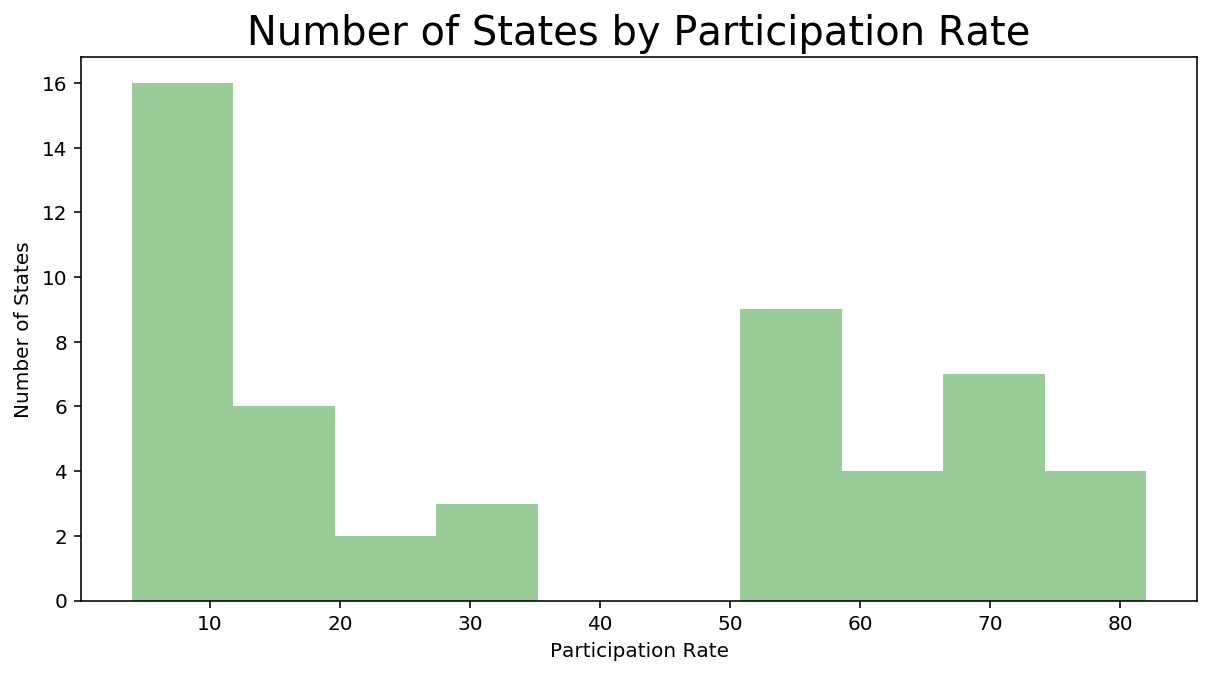

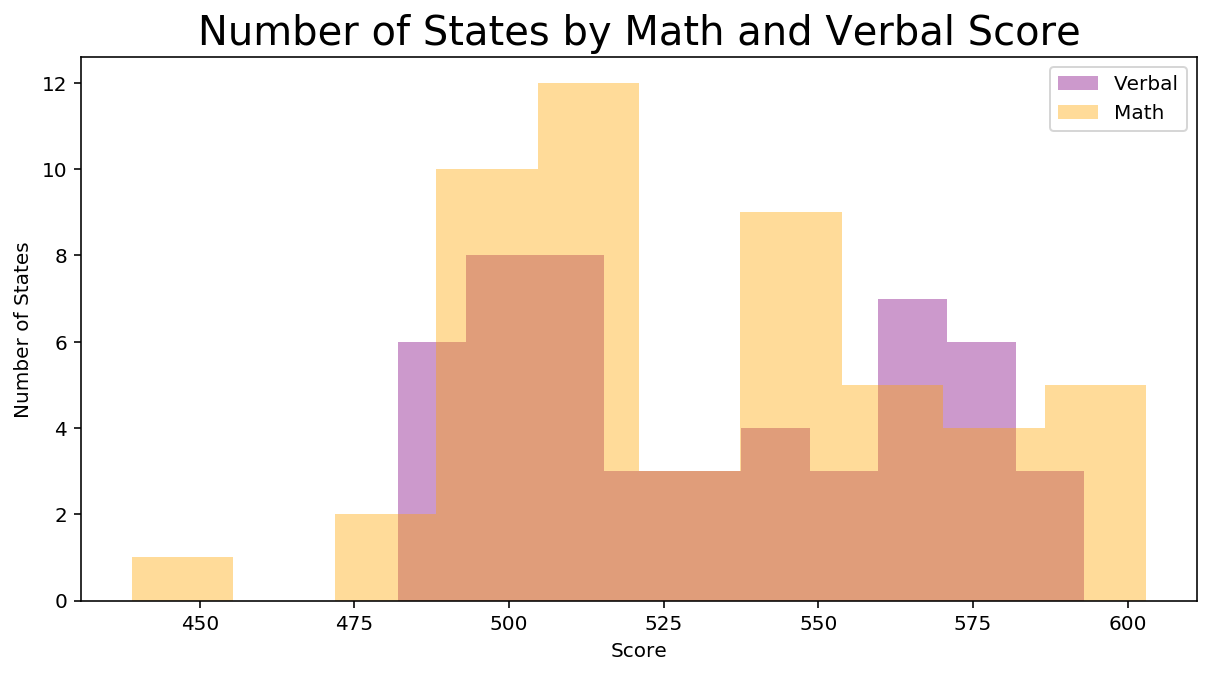

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sat_exclude_all = sat[sat['State']!='All']

plt.figure(figsize=(10,5))
sns.distplot(sat_exclude_all["Rate"] , color="green",bins=10,kde=False)
plt.xlabel('Participation Rate')
plt.ylabel('Number of States')
plt.title('Number of States by Participation Rate',fontsize = 20)
plt.show()

plt.figure(figsize=(10,5))
sns.distplot( sat_exclude_all["Verbal"] , color="purple",bins=10,kde=False,label='Verbal')
sns.distplot( sat_exclude_all["Math"] , color="orange",bins=10,kde=False,label='Math')
plt.ylabel('Number of States')
plt.xlabel('Score')
plt.title('Number of States by Math and Verbal Score',fontsize = 20)
plt.legend()
plt.show()

<font color='red'> You can improve the graphs by working on the binsize of the histogram. The binsize is important to get the best approximation. However, you are asked to `plot the distributions for each of Rate, Math, and Verbal seperately`. In future pls make sure that you read and understand the question correctly.
    

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

<font color=blue>

Pairplot showcases pairwise relationships between each attributes in the dataset.
There are 2 chart types found in pairplot:
1. Histogram
    This is the distribution plot for each attributes
2. Scatter plot
    From points, we will be able to observe if there exists any correlation between the 2 measured attributes.
    
Example:
- We see that the there is negative correlation between both verbal and math score as compared to participation rate.
- Those states with a lower participation rate observes better students' performance.

</font>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


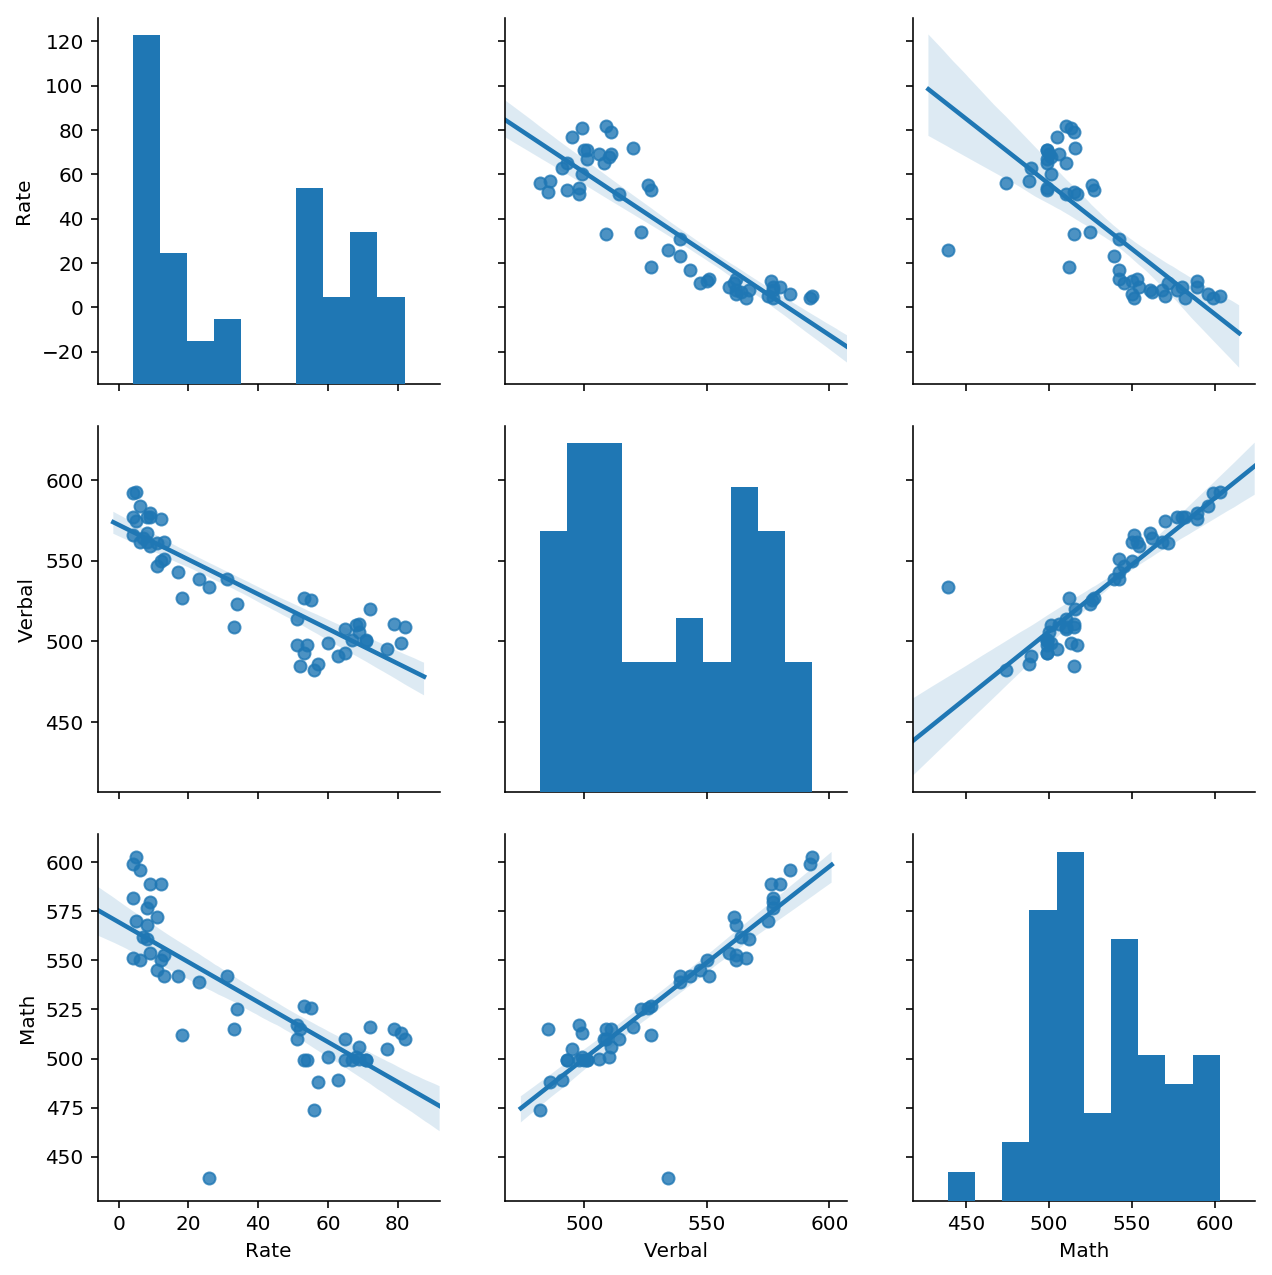

In [8]:
sns.pairplot(sat_exclude_all,kind="reg",height=3)
plt.show()

<font color='red'> Correct, Always its good practise to give titles to the graphs.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

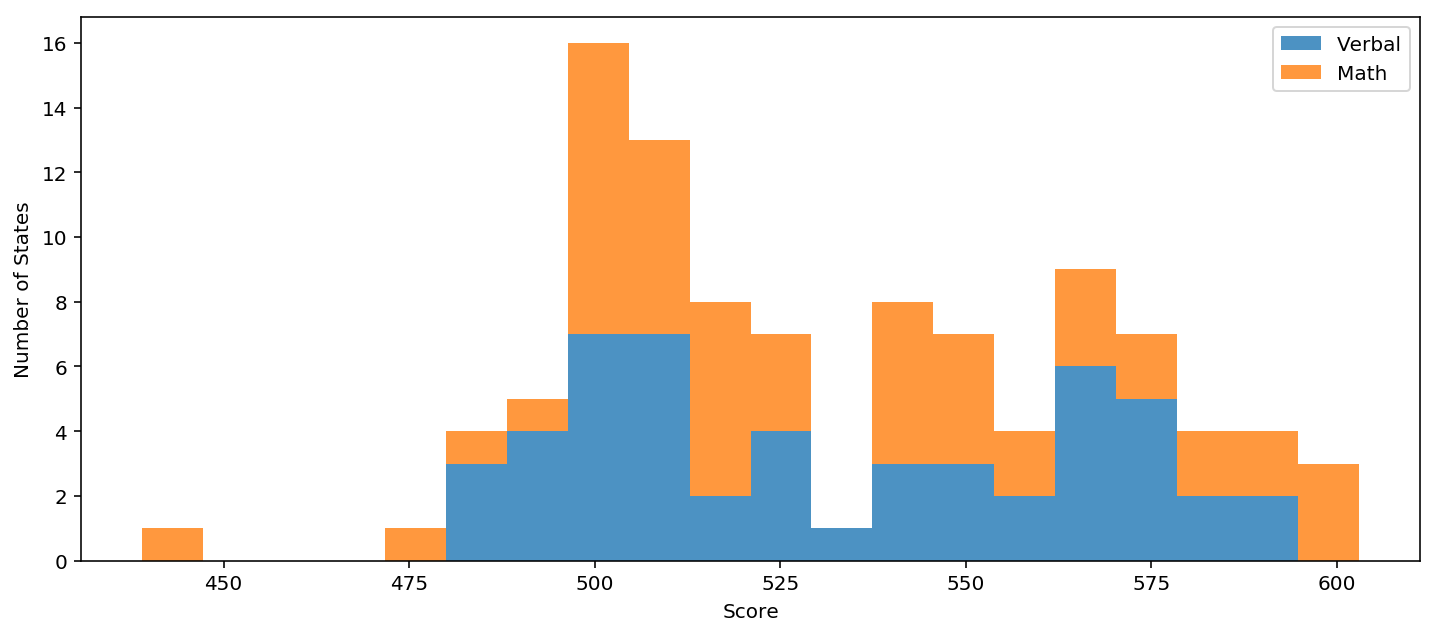

In [9]:
# sat[['Verbal','Math']].hist(bins=20,stacked=True)
sat_exclude_all.loc[0:][['Verbal','Math']].plot.hist(bins=20,stacked=True,alpha=0.8,figsize=(12,5))
plt.ylabel('Number of States')
plt.xlabel('Score')
plt.show()

<font color='red'> The font size of axis can be bit large and include title. You can use stacked bar plots inorder to better visualise the data. 

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

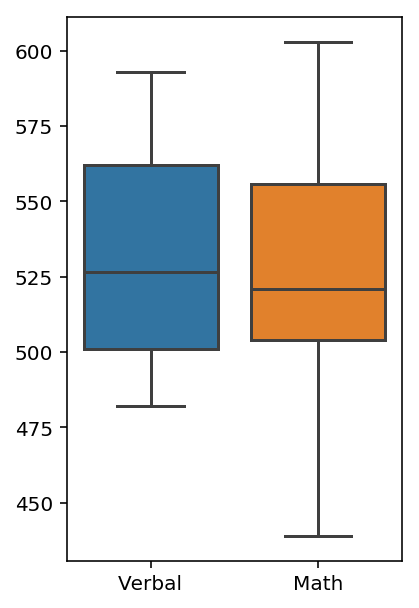

In [10]:
fig=plt.figure(figsize=(3,5))
sns.boxplot(data=sat.loc[:,['Verbal','Math']])
plt.show()

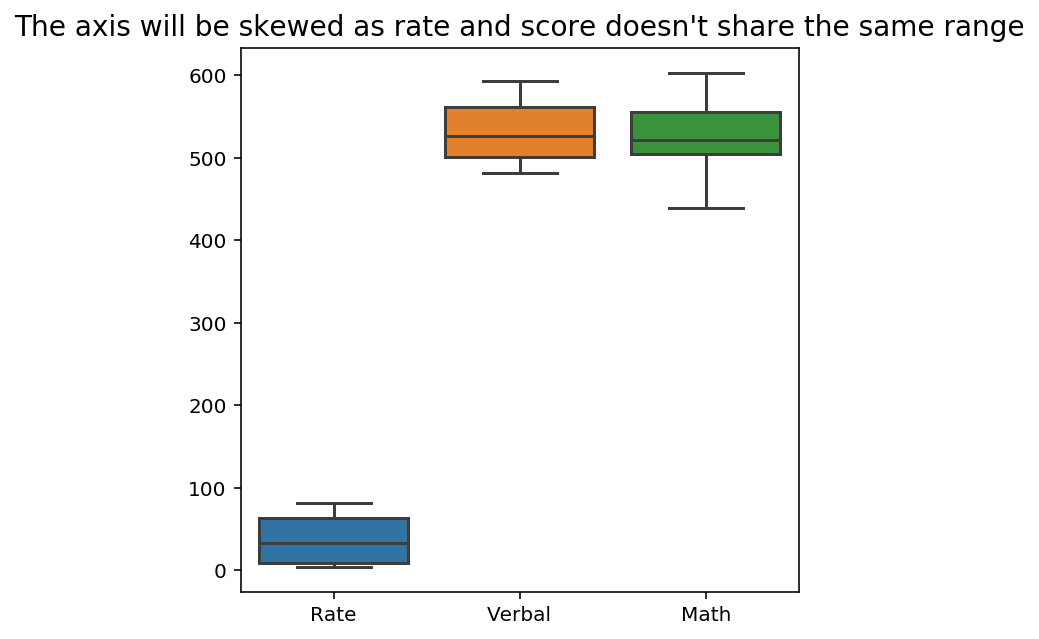

In [11]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=sat)
plt.title("The axis will be skewed as rate and score doesn't share the same range",fontsize=14)
plt.show()


<font color='red'> Correct but the title of the graph has to be concise. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


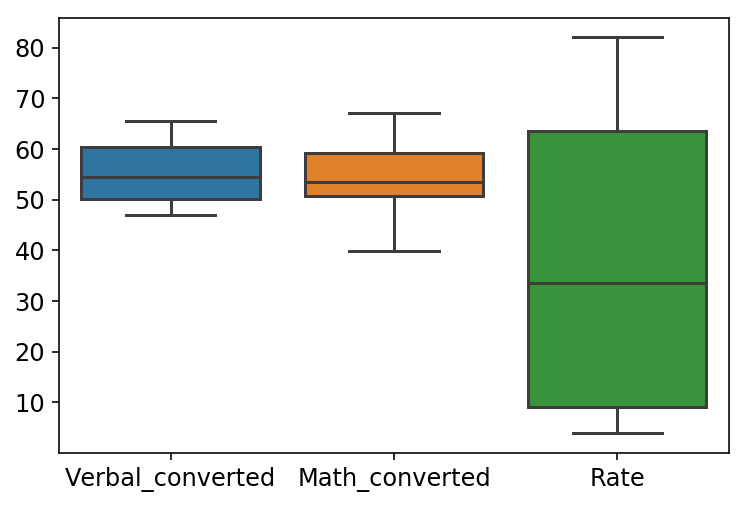

In [12]:
# Combined boxplot chart
# Converting Math and Verbal to the range of 0-100 so that it shares the same scale as Rate

def myf(cell):
    """
    As the range of score is from 200-800, I'm converting Math and Verbal score using this function
    to the range of 0 - 100 so that it shares the same scale as Rate
    """
    return (cell-200)/6
    
sat['Math_converted']=sat['Math'].map(myf)
sat['Verbal_converted']=sat['Verbal'].map(myf)

plt.rcParams.update({'font.size': 12})
sns.boxplot(data=sat.loc[:,['Verbal_converted','Math_converted','Rate']])

plt.show()

<font color='red'> This part is wrong. You need to standardise your values and bring all variables in same scale. 

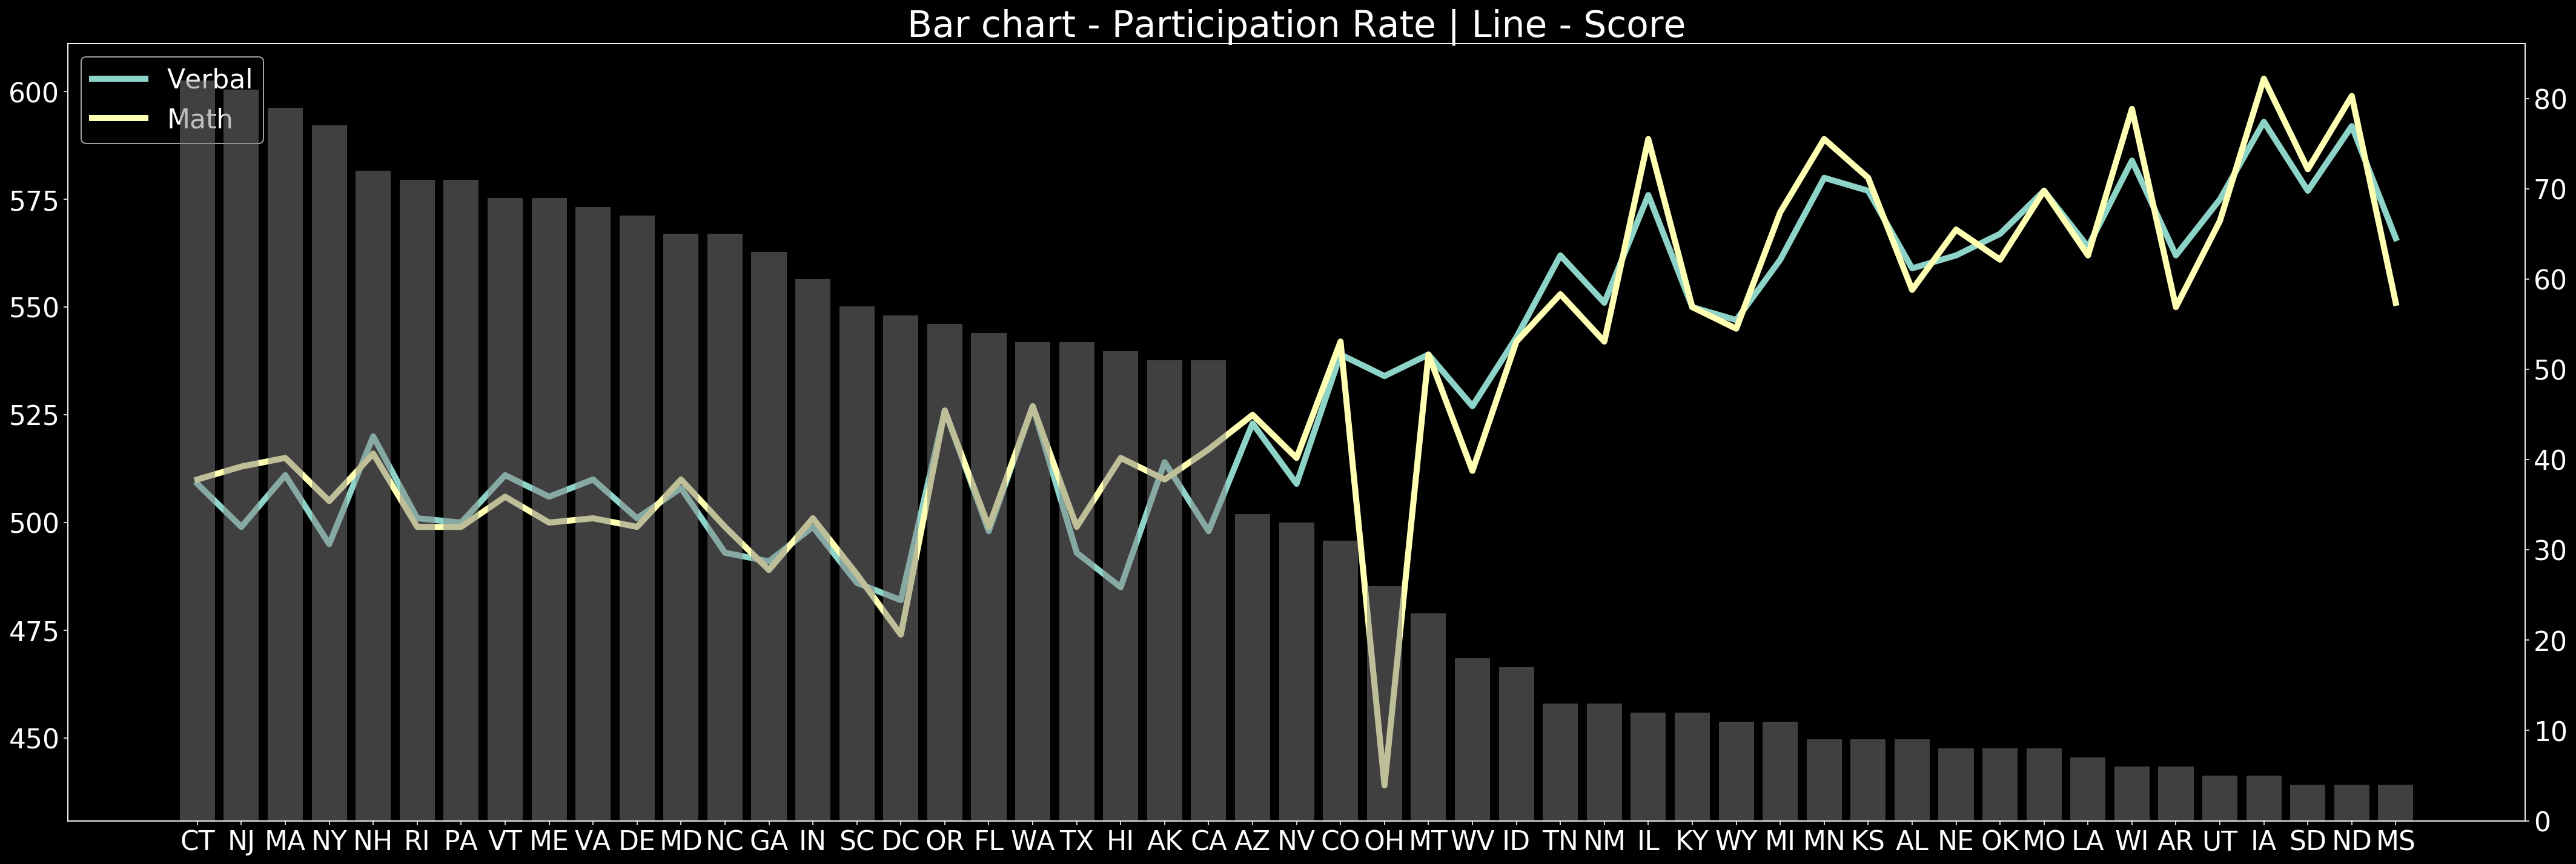

In [13]:
# Combined chart

import matplotlib.pyplot as plt

with plt.style.context(('dark_background')):

    plt.rcParams.update({'font.size': 22})
    fig, ax1 = plt.subplots(figsize=(30, 10))

    ax1.plot(sat_exclude_all['State'],sat_exclude_all['Verbal'],label='Verbal',linewidth=5)
    ax1.plot(sat_exclude_all['State'],sat_exclude_all['Math'],label='Math',linewidth=5)
    plt.legend()

    ax2 = ax1.twinx()
    ax2.bar(sat_exclude_all['State'], sat_exclude_all['Rate'],alpha=0.5,color='grey')
    
    fig.tight_layout()
    plt.title('Bar chart - Participation Rate | Line - Score', fontsize = 30)
    plt.show()

<font color='red'> This graph doesnot add any value to this question 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [14]:
verbal_mean=sat_exclude_all['Verbal'].mean() 
#532.0192307692307
sat_exclude_all[sat_exclude_all['Verbal']>sat_exclude_all['Verbal'].mean()].index


Int64Index([26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
            44, 45, 46, 47, 48, 49, 50],
           dtype='int64')

In [15]:
"Answer: {} states are above mean - that means the mean is very close to the median as well as there are 50 states in US."\
.format(sat_exclude_all['State']\
.iloc[sat_exclude_all[sat_exclude_all['Verbal']>sat_exclude_all['Verbal']\
.mean()].index].count())


'Answer: 24 states are above mean - that means the mean is very close to the median as well as there are 50 states in US.'

<font color='red'> Correct

In [16]:
sat_exclude_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.5+ KB


In [17]:
sat_exclude_all['Verbal'].describe()

count     51.000000
mean     532.529412
std       33.360667
min      482.000000
25%      501.000000
50%      527.000000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

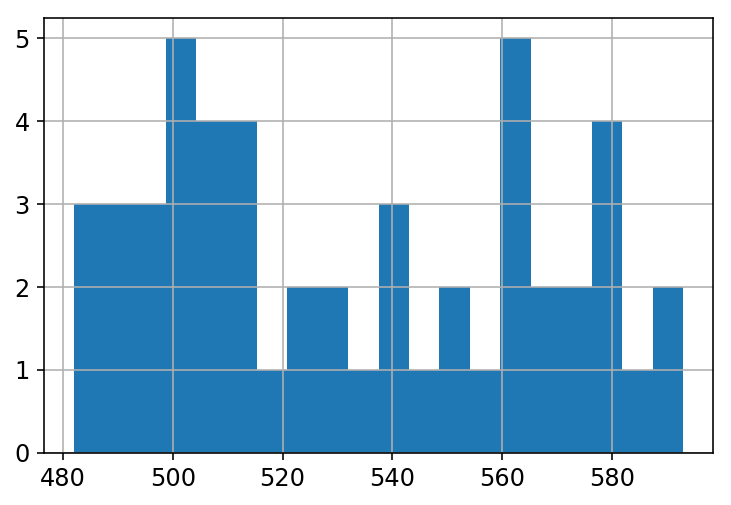

In [18]:
sat_exclude_all['Verbal'].hist(bins=20)
plt.show()

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [19]:
state_mean=set(sat_exclude_all['State']\
               .iloc[sat_exclude_all[sat_exclude_all['Verbal']>sat_exclude_all['Verbal'].mean()]\
                .index])
state_median=set(sat_exclude_all['State']\
                 .iloc[sat_exclude_all[sat_exclude_all['Verbal']>sat_exclude_all['Verbal'].median()]\
                       .index])

# List of states that have Verbal scores greater than median
pp.pprint(state_median,compact=True)

{'AL', 'AR', 'CO', 'IA', 'ID', 'IL', 'KS', 'KY', 'LA', 'MI', 'MN', 'MO', 'MS',
 'MT', 'ND', 'NE', 'NM', 'OH', 'OK', 'SD', 'TN', 'UT', 'WI', 'WY'}


In [20]:
print(state_mean - state_median)
print(state_median - state_mean)

set()
set()


<font color='red'> This part doesnot answer the question. You are asked to compare the number of states that is above the median value and compared with the number states that are above mean. 

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
# Create a new column "diff_Verbal_Math"

sat_exclude_all['diff_Verbal_Math']=sat_exclude_all['Verbal']-sat_exclude_all['Math']
sat_exclude_all.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,State,Rate,Verbal,Math,diff_Verbal_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


<font color='red'> Correct

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
states_verbal_better=\
pd.DataFrame(sat_exclude_all.sort_values(by='diff_Verbal_Math',ascending=False).iloc[:10])

# Top 10 States with Verbal score is greater than Math
states_verbal_better

,State,Rate,Verbal,Math,diff_Verbal_Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [23]:
states_math_better=\
pd.DataFrame(sat_exclude_all.sort_values(by='diff_Verbal_Math',ascending=True).iloc[:10])

# Top 10 States with Math score is greater than Verbal
states_math_better

,State,Rate,Verbal,Math,diff_Verbal_Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
49,ND,4,592,599,-7


In [24]:
# Header for Top 3 States where Verbal > Math
list(states_verbal_better.iloc[:3].index)

[27, 50, 29]

In [25]:
# Header for Top 3 States where Math > Verbal
list(states_math_better.iloc[:3].index)

[21, 23, 1]

<font color='red'> Correct. But it would be good if you could list their names instead of index.

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


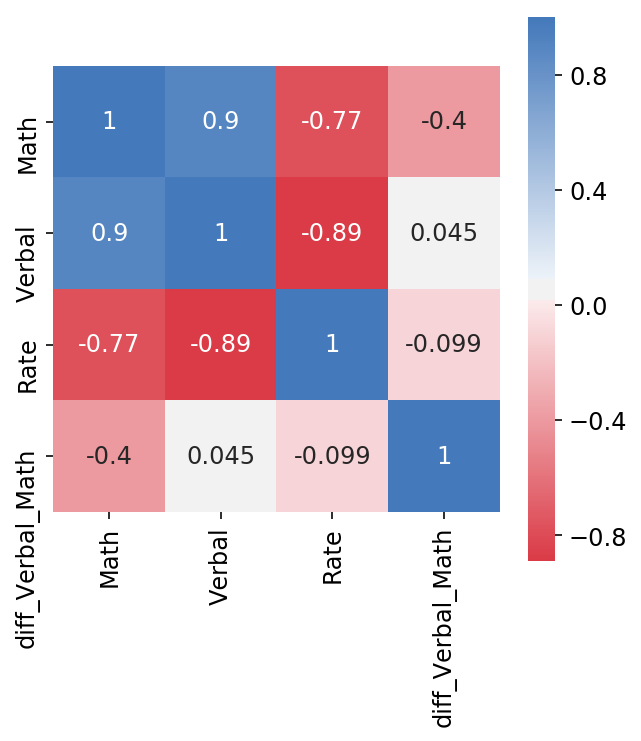

In [26]:
import seaborn as sns

plt.figure(figsize=(5,5))
corr = sat_exclude_all.loc[0:,['Math','Verbal','Rate','diff_Verbal_Math']].corr()
sns.heatmap(corr, cmap=sns.diverging_palette(10, 250, as_cmap=True), square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

plt.show()

### Explanation of the corr heatmap

<font color=blue>
The higher the Participation Rate, the lower score (both Math and Verbal) observed.
Also, both Math and Verbal scores are positively correlated.
    </font>

<font color='red'> The explanation for this question is very brief. You can eloborate your discussion on comparing the relations with diff of verbal and math as well as.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [27]:
sat_exclude_all.describe()

,Rate,Verbal,Math,diff_Verbal_Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


### Write up what each of the rows returned by .describe()
<font color=blue>

#### count 
- suggests the total number of values observed in each column, excluding null.
- there are 51 values in the table

#### Rate
- Average participation rate is 37 percent, with the minimum of 4 percent and maximum of 82 percent across United States.
- Median (50th percentile) of partipation rate is 33%.

#### Score
- Average Verbal score across United States is 532, and Math being 531.
- The lowest Verbal score of all states is 482, whereas lowest Math score is 439.
- We see the median for Verbal and Math being 562 and 557.
- Across all states, we see the highest Verbal and Math score being 593 and 603.

</font>

<font color='red'> Correct

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [28]:
drug=pd.read_csv('./drug-use-by-age.csv')
drug.head(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [29]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [30]:
# Clean frequecy columns that are objects

dirty_column = ['cocaine-frequency','crack-frequency',\
                'heroin-frequency','inhalant-frequency',\
                'oxycontin-frequency','meth-frequency']
for col in dirty_column:
    drug[col] = pd.to_numeric(drug[col].replace('-',''))


In [31]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [32]:
drug['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [33]:
freq_col = [col for col in drug.columns if 'frequency' in col]
use_col = [col for col in drug.columns if 'use' in col]

pp.pprint(freq_col,compact=True)

['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency',
 'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency',
 'inhalant-frequency', 'pain-releiver-frequency', 'oxycontin-frequency',
 'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency',
 'sedative-frequency']


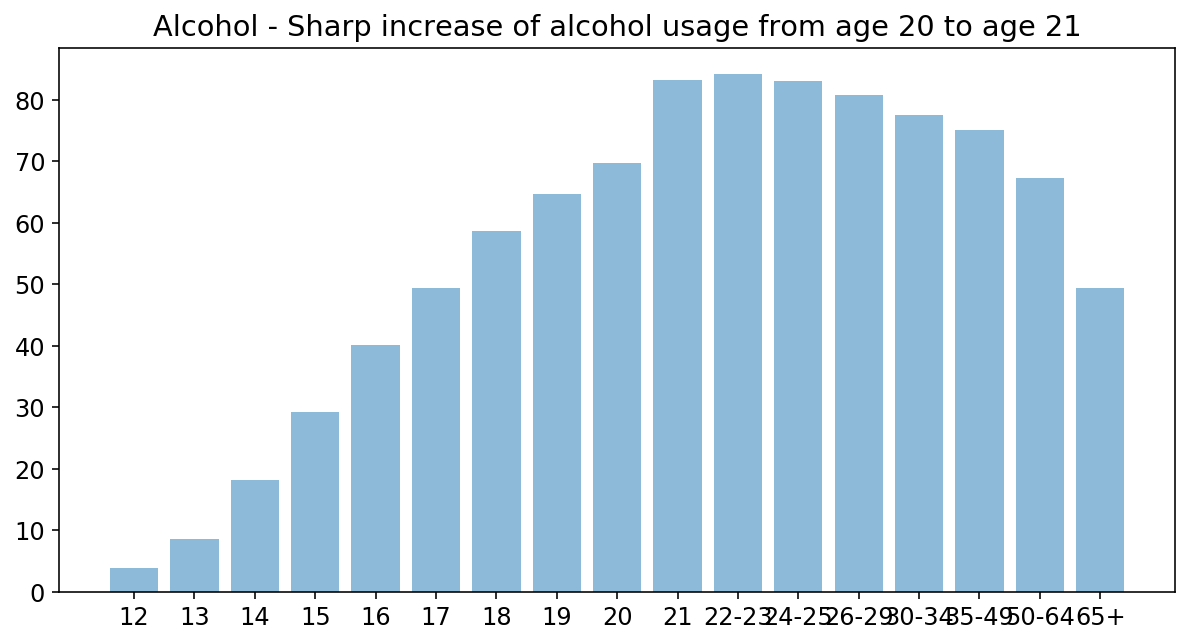

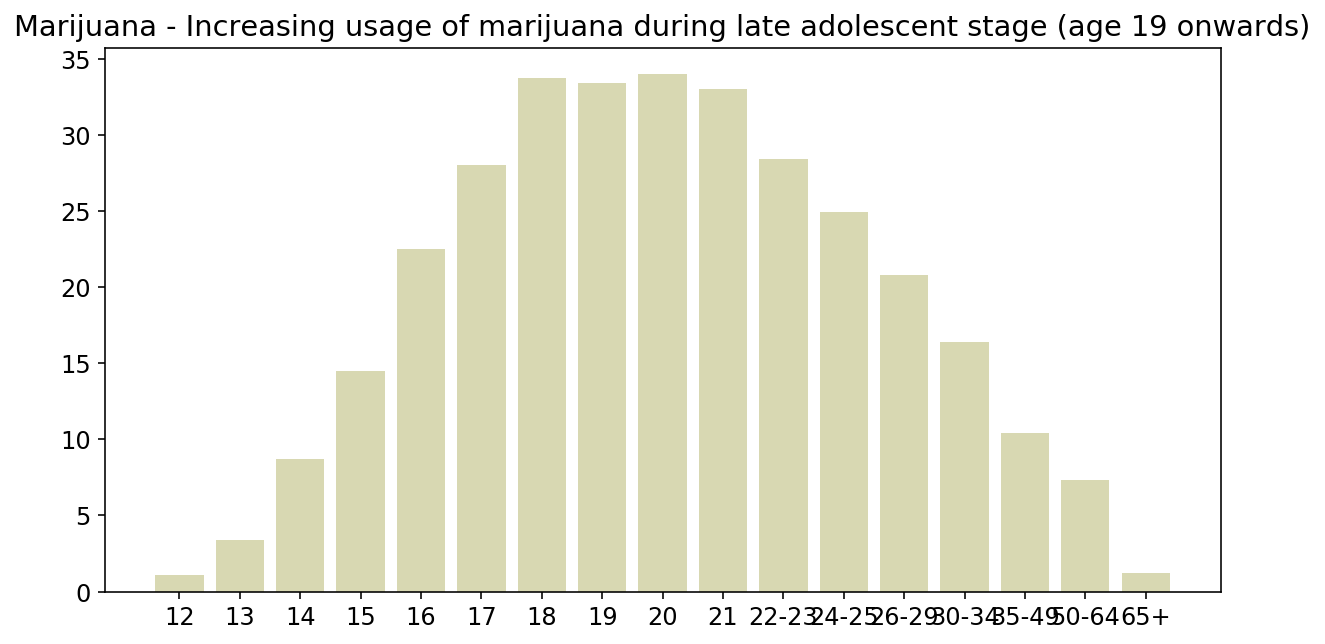

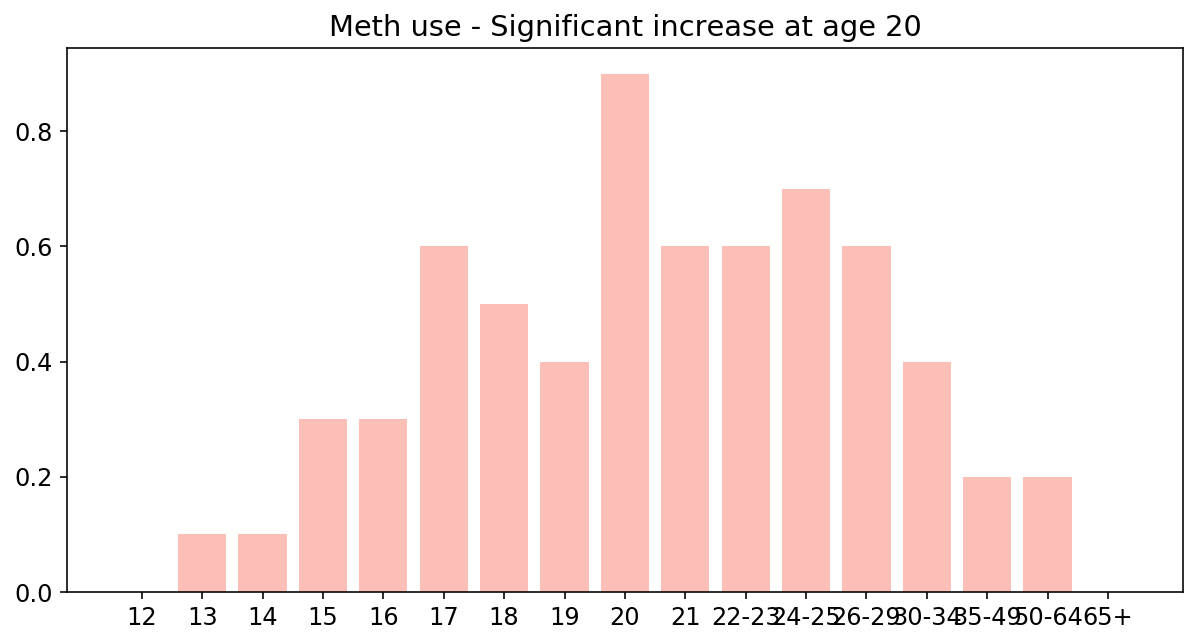

In [34]:
plt.figure(figsize=(10,5))
plt.bar(drug['age'],drug['alcohol-use'],alpha=0.5)
plt.title('Alcohol - Sharp increase of alcohol usage from age 20 to age 21')
plt.show()

plt.figure(figsize=(10,5))
plt.bar(drug['age'],drug['marijuana-use'],alpha=0.3,color='olive')
plt.title('Marijuana - Increasing usage of marijuana during late adolescent stage (age 19 onwards)')
plt.show()

plt.figure(figsize=(10,5))
plt.bar(drug['age'],drug['meth-use'],alpha=0.5,color='salmon')
plt.title('Meth use - Significant increase at age 20')
plt.show()

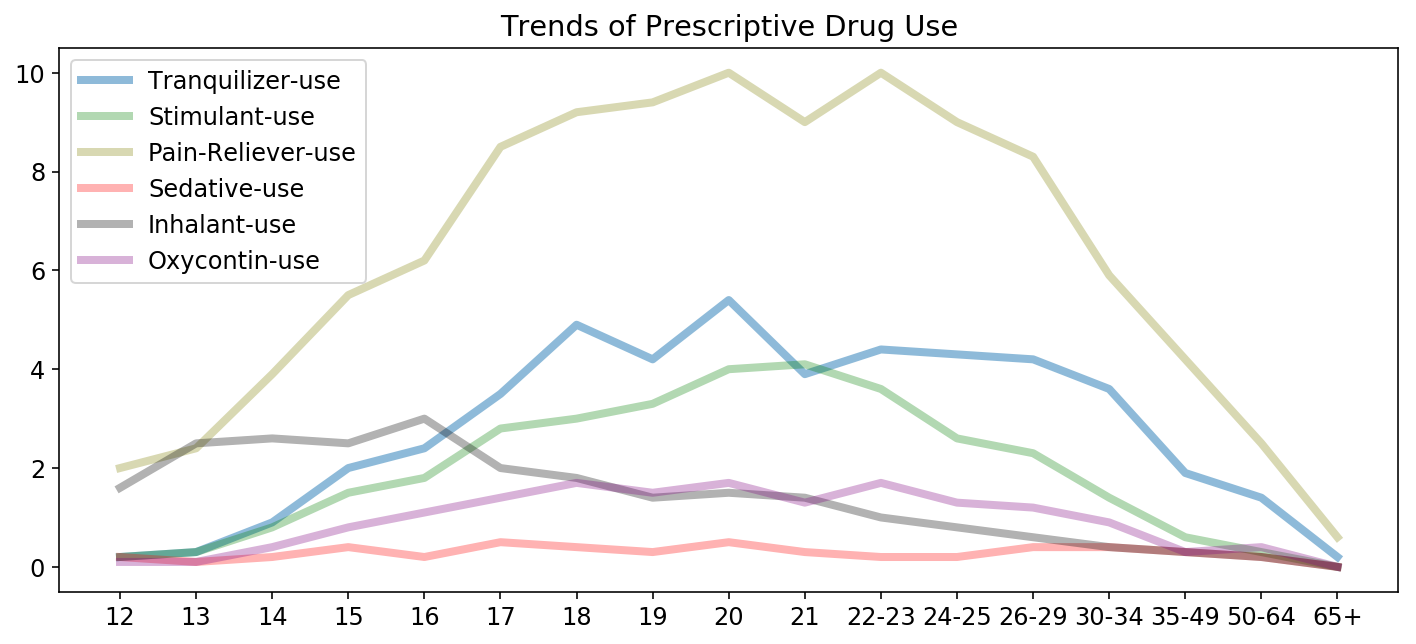

In [35]:
# Focusing on presriptive drugs (Pain relievers, tranquilizers, stimulants, sedatives, inhalant, oxycontin)
plt.figure(figsize=(12,5))

plt.plot(drug['age'],drug['tranquilizer-use'],alpha=0.5,label='Tranquilizer-use',linewidth=4)

plt.plot(drug['age'],drug['stimulant-use'],alpha=0.3,color='green',label='Stimulant-use',linewidth=4)

plt.plot(drug['age'],drug['pain-releiver-use'],alpha=0.3,color='olive',label='Pain-Reliever-use',linewidth=4)

plt.plot(drug['age'],drug['sedative-use'],alpha=0.3,color='red',label='Sedative-use',linewidth=4)

plt.plot(drug['age'],drug['inhalant-use'],alpha=0.3,color='black',label='Inhalant-use',linewidth=4)

plt.plot(drug['age'],drug['oxycontin-use'],alpha=0.3,color='purple',label='Oxycontin-use',linewidth=4)

plt.title('Trends of Prescriptive Drug Use')
plt.legend()
plt.show()

In [36]:
%%HTML

<div class='tableauPlaceholder' id='viz1554038466807' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Dr&#47;DrugUsebyAge&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DrugUsebyAge&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Dr&#47;DrugUsebyAge&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1554038466807');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='920px';vizElement.style.height='427px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<font color=blue>
The viz above shows that Inhalant use is mainly during teenagers - very likely due to medical reasons. However, a couple of spikes observed at the age of 18  - marijuana, hallucinogen, oxycontin, tranquilizer and stimulant. Another wave of spikes observed at the age of 20 as well with cocaine, heroin, stimulant and meth and sedative usage. It indicates change of behaviors  when an individual enters into different important stages of life ie late adolescent and early adulthood. That could due to the change of school environment from high school into college and from college into uni.
</font>

<font color='red'> Please use seaborn or matplotlib for data visualization. 

In [37]:
# COMBINE ALL PRESCRIPTIVE DRUG TOGETHER AND EXAMINE IT WITH OTHER 
drug['presriptive_drug_use'] =  drug['tranquilizer-use']+\
                                drug['stimulant-use']+\
                                drug['pain-releiver-use']+\
                                drug['oxycontin-use']+\
                                drug['sedative-use']


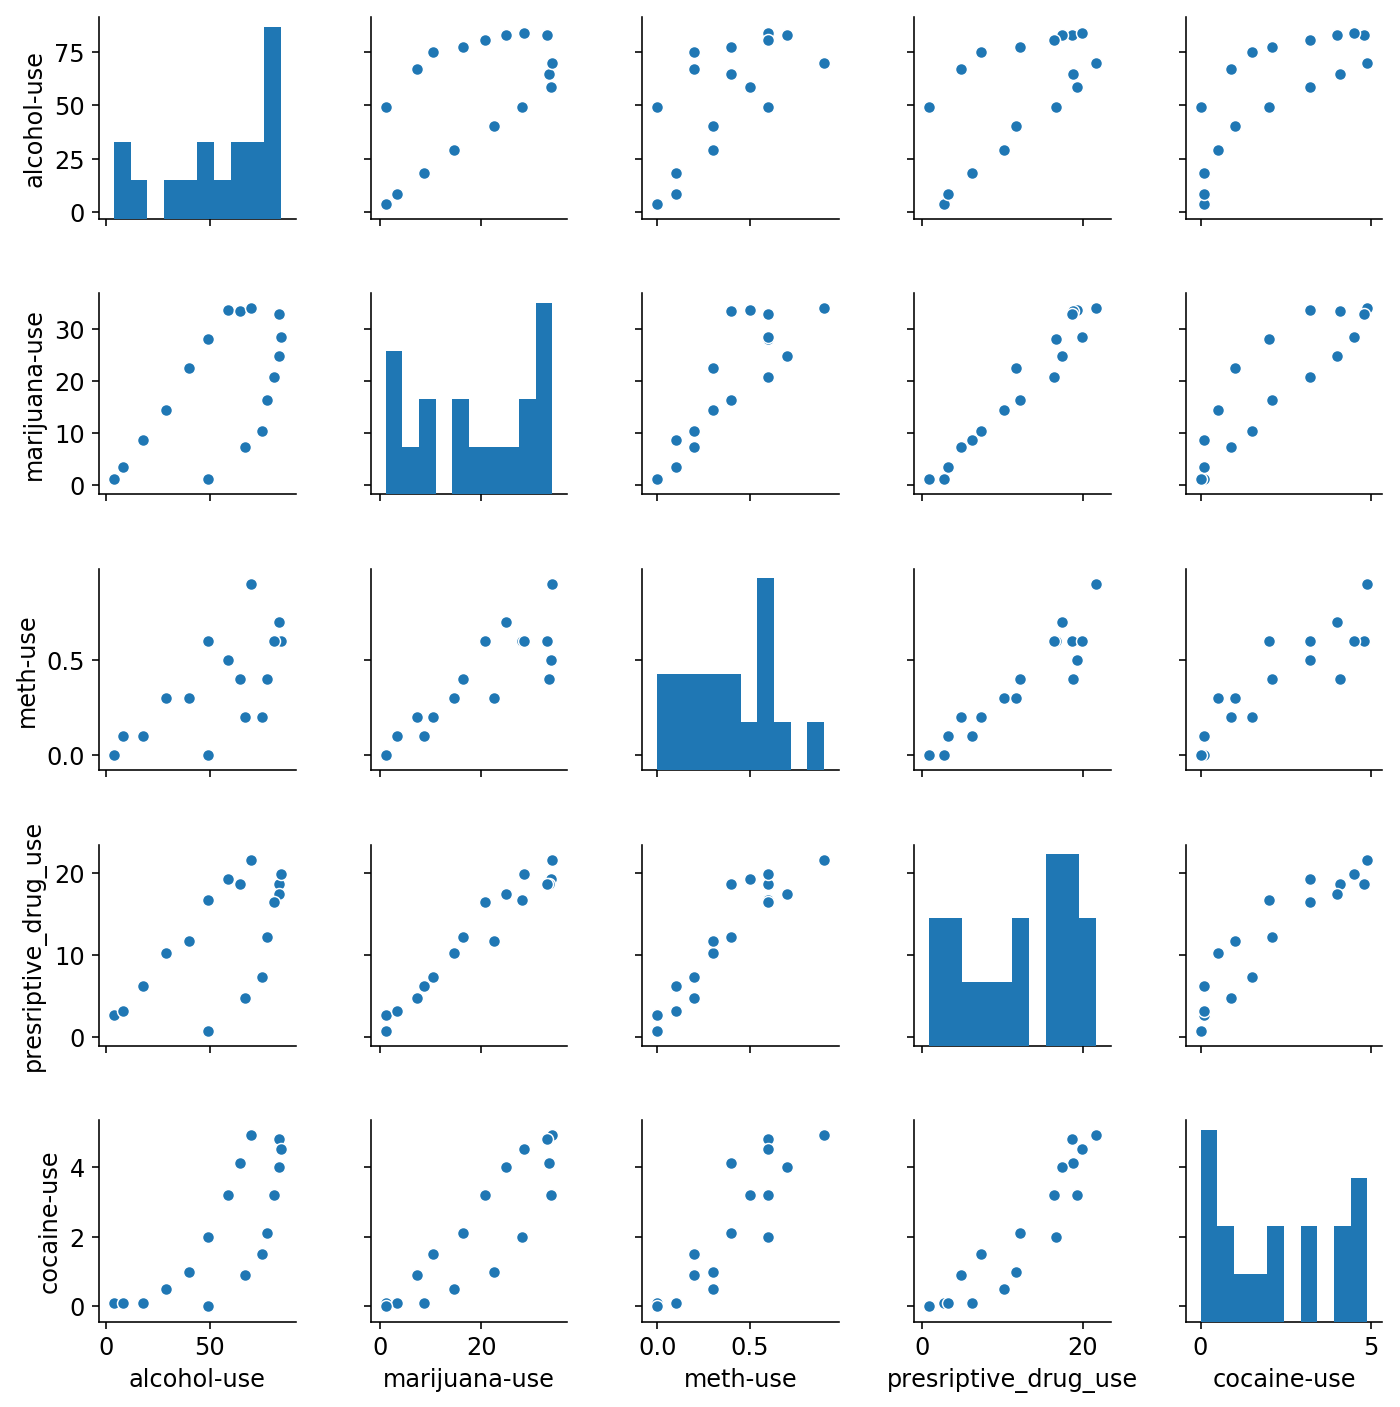

In [38]:
sns.pairplot(drug, vars=['alcohol-use','marijuana-use','meth-use','presriptive_drug_use','cocaine-use'],height=2)
plt.show()

In [39]:
# Creating 2 subsets of data for Frequencies and Usage

freq_col = [col for col in drug.columns if 'frequency' in col]
use_col = [col for col in drug.columns if 'use' in col]

drug_subset_freq = drug.loc[0:,freq_col]
drug_subset_use = drug.loc[0:,use_col]

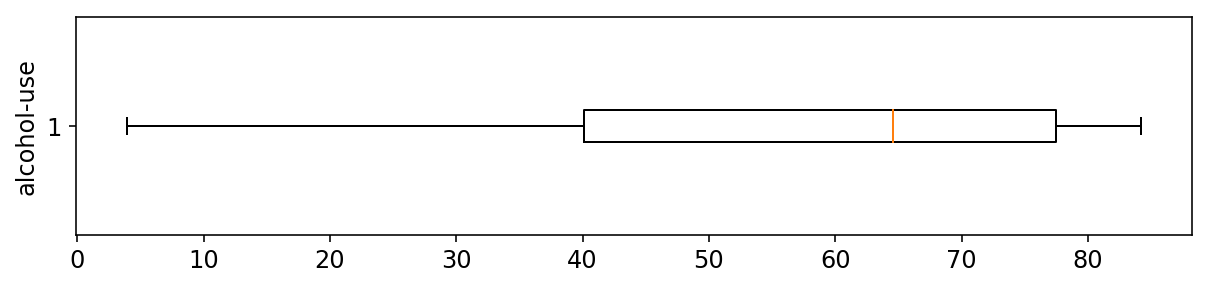

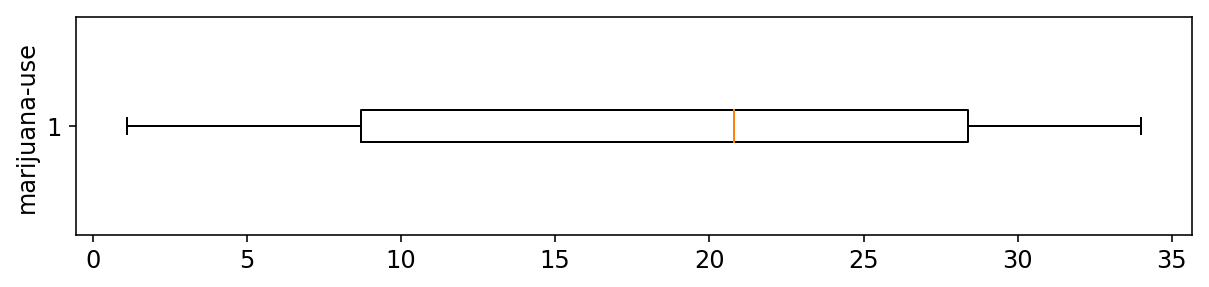

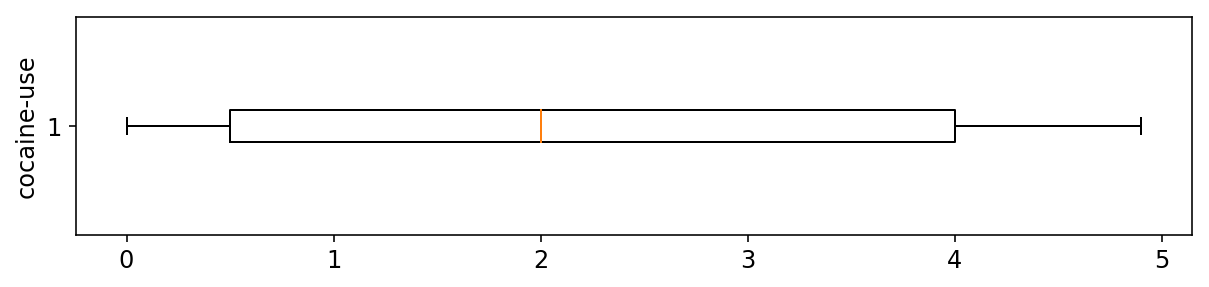

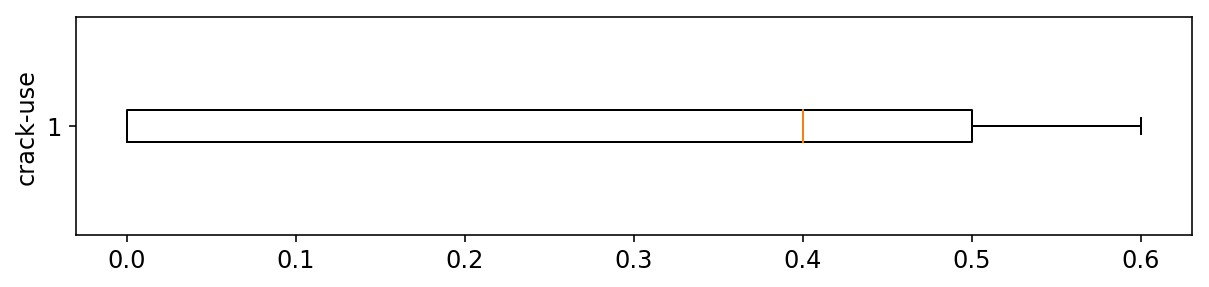

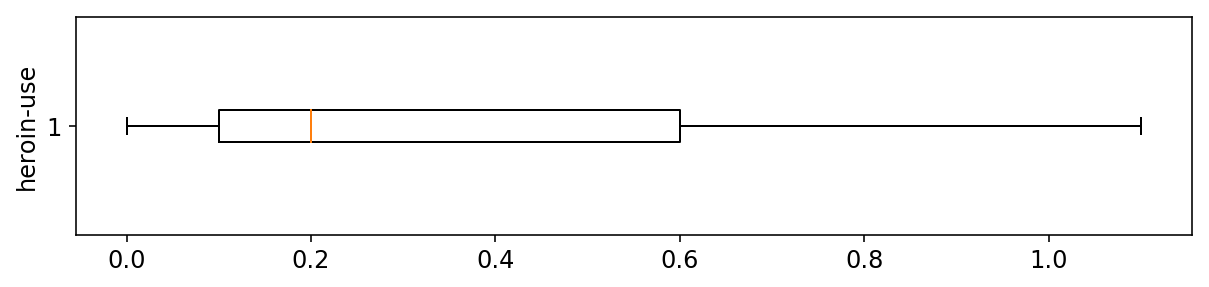

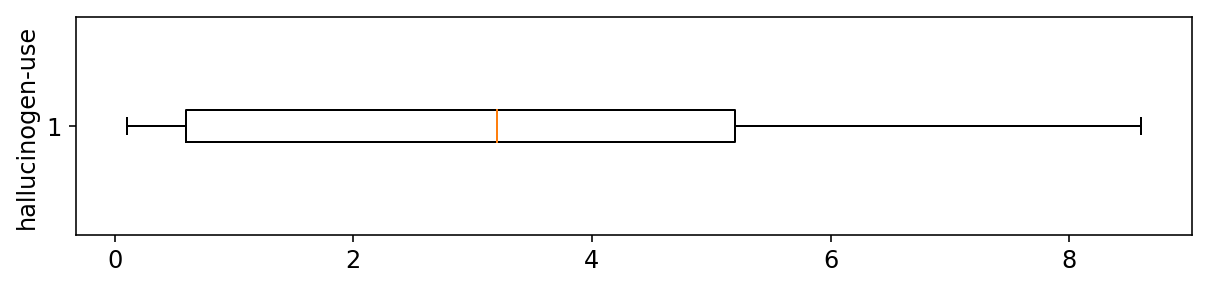

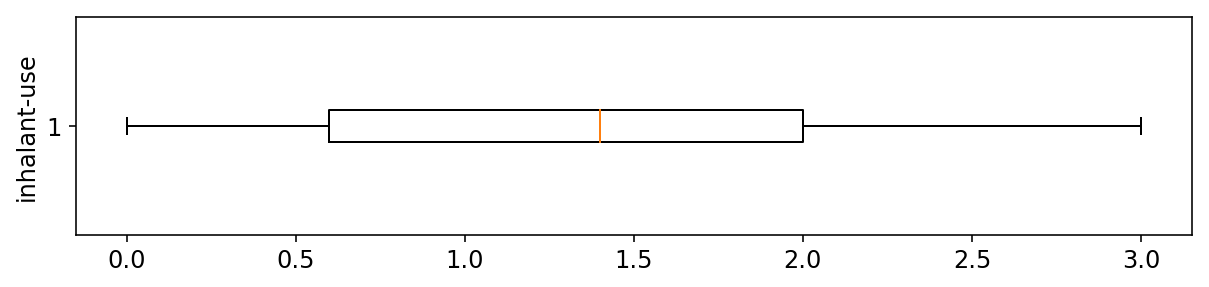

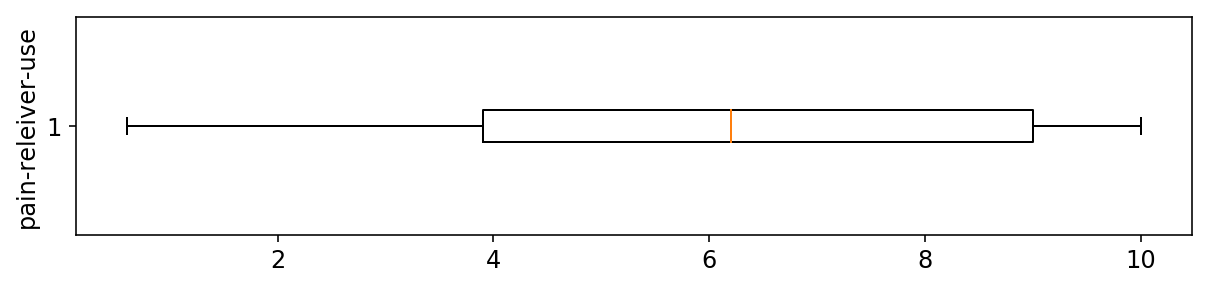

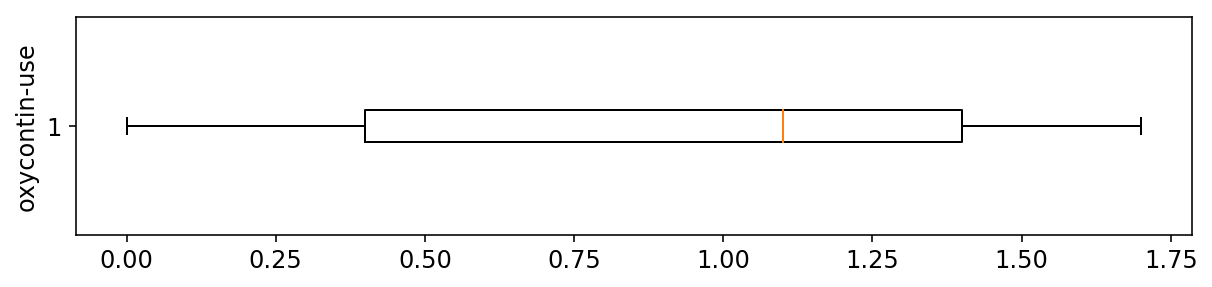

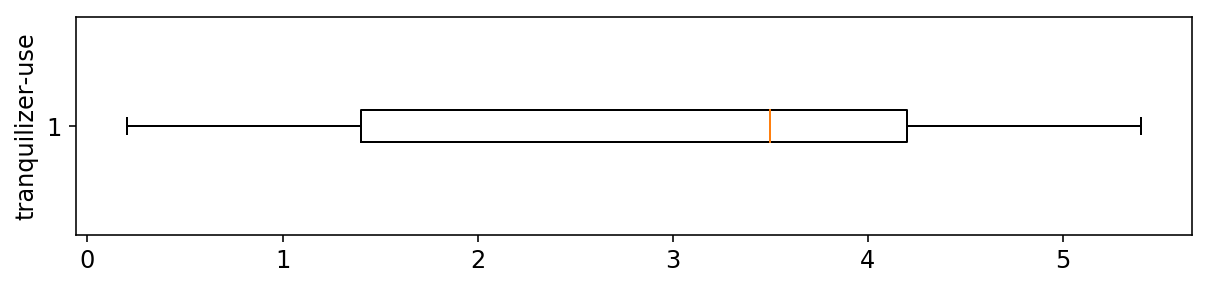

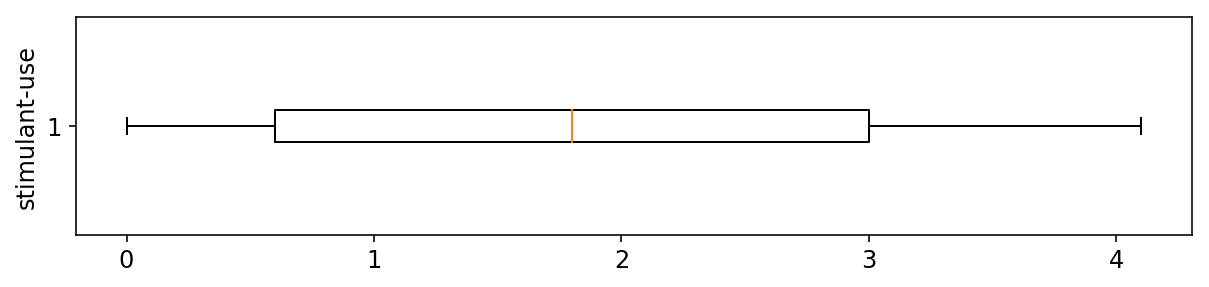

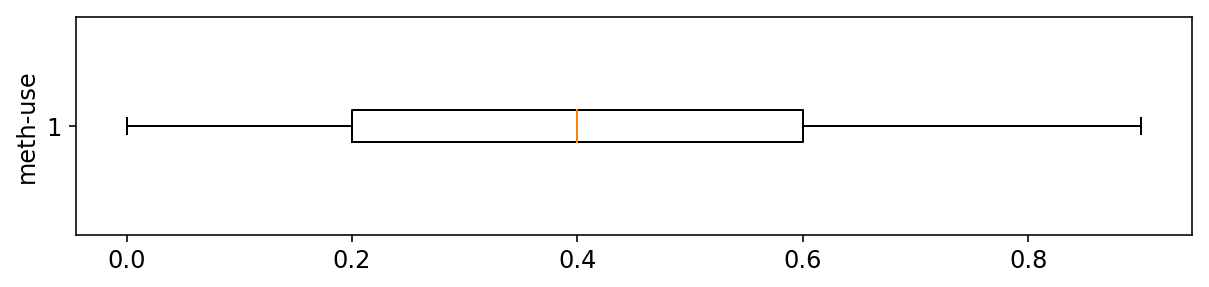

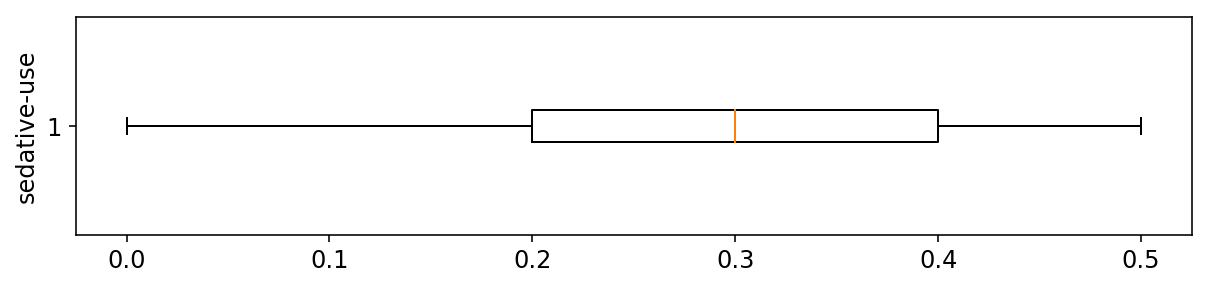

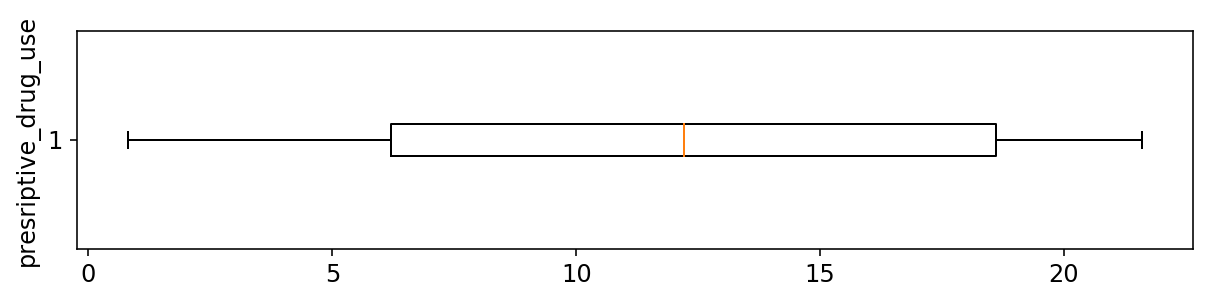

In [40]:
# Creating boxplots for Usage
for col in drug_subset_use.columns:
    fig = plt.figure(figsize=(10,2))
    plt.boxplot(drug_subset_use[col],vert=False)
    plt.ylabel(col)
    plt.show()

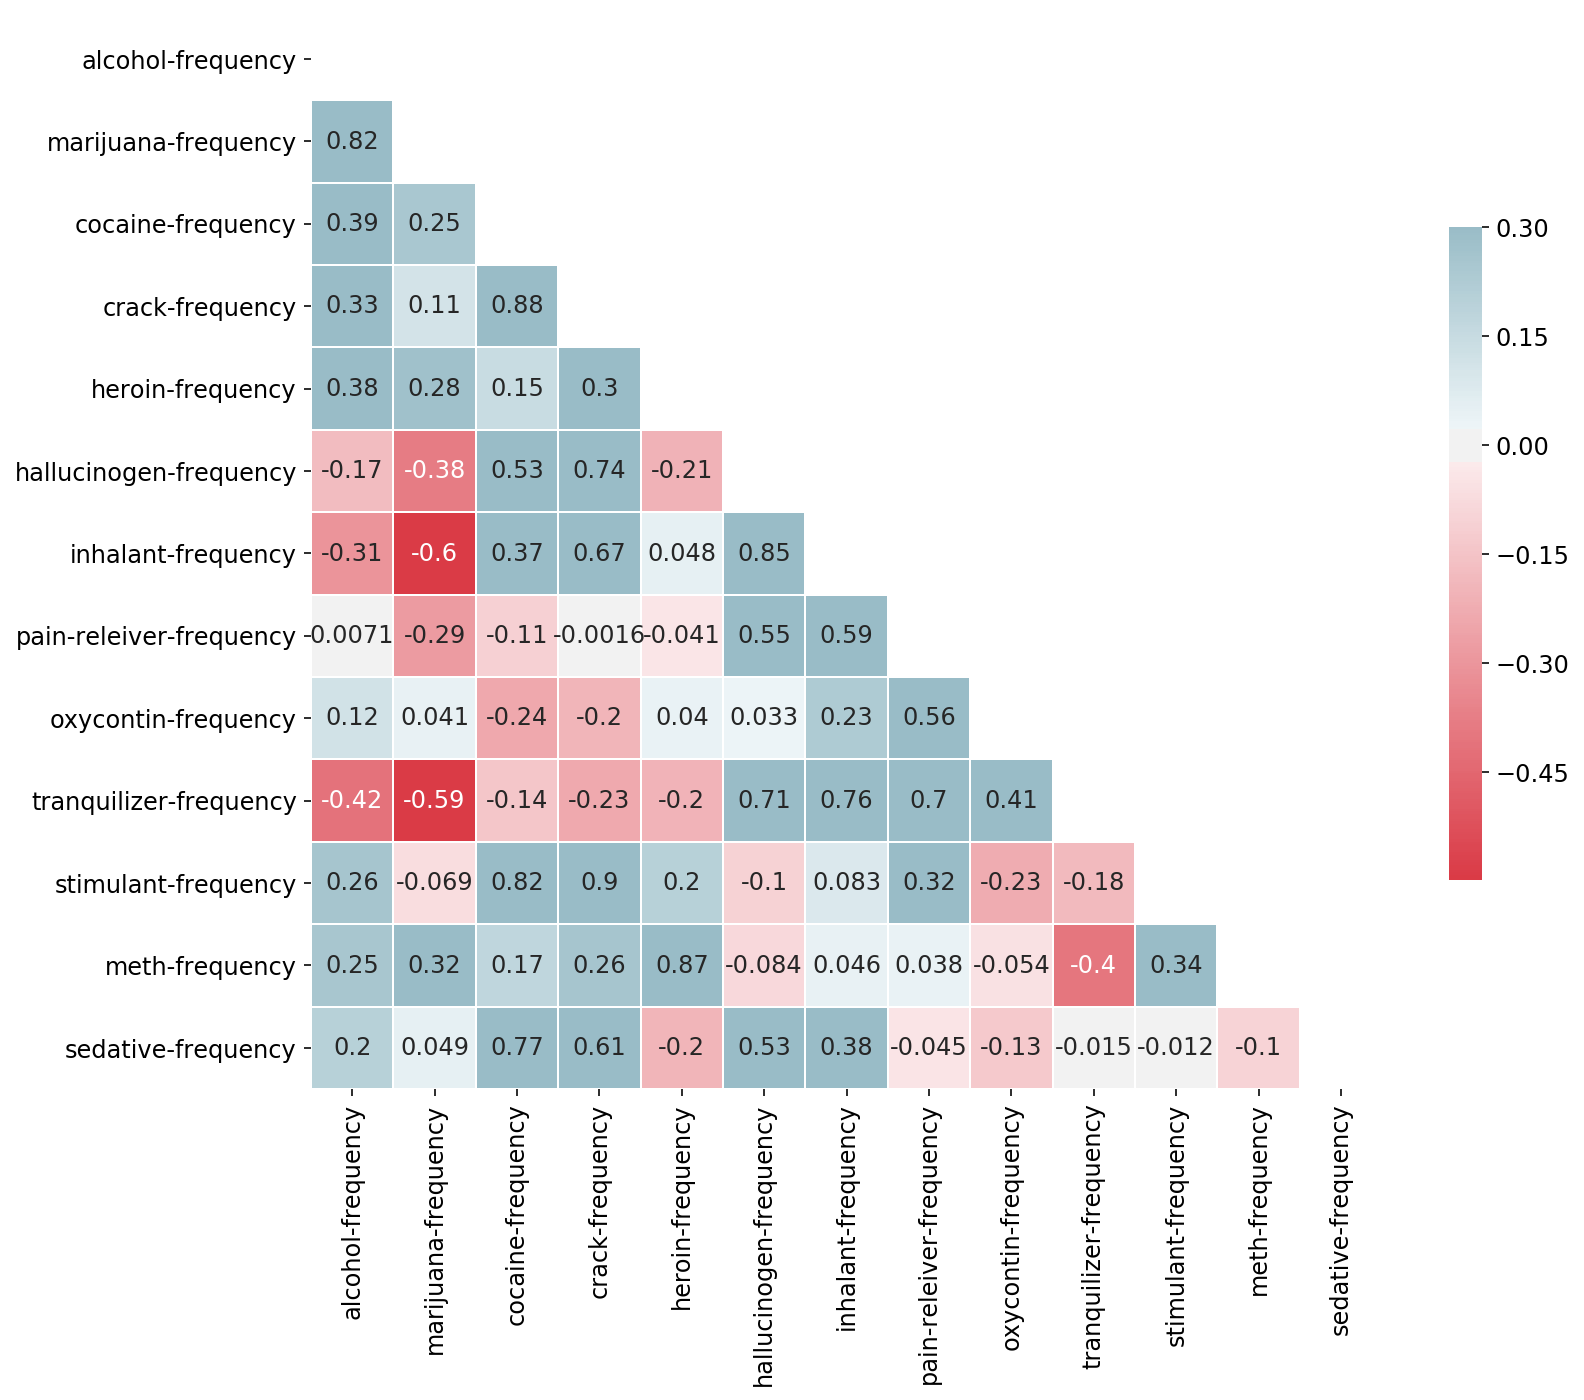

In [41]:
# Looking at correlations between frequencies of each elements

freq_col = [col for col in drug.columns if 'frequency' in col]
use_col = [col for col in drug.columns if 'use' in col]
corr_col = freq_col + use_col

# sns.heatmap(drug[freq_col].corr(),annot=True,cmap=cmap,square=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(drug[freq_col].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(drug[freq_col].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

plt.show()

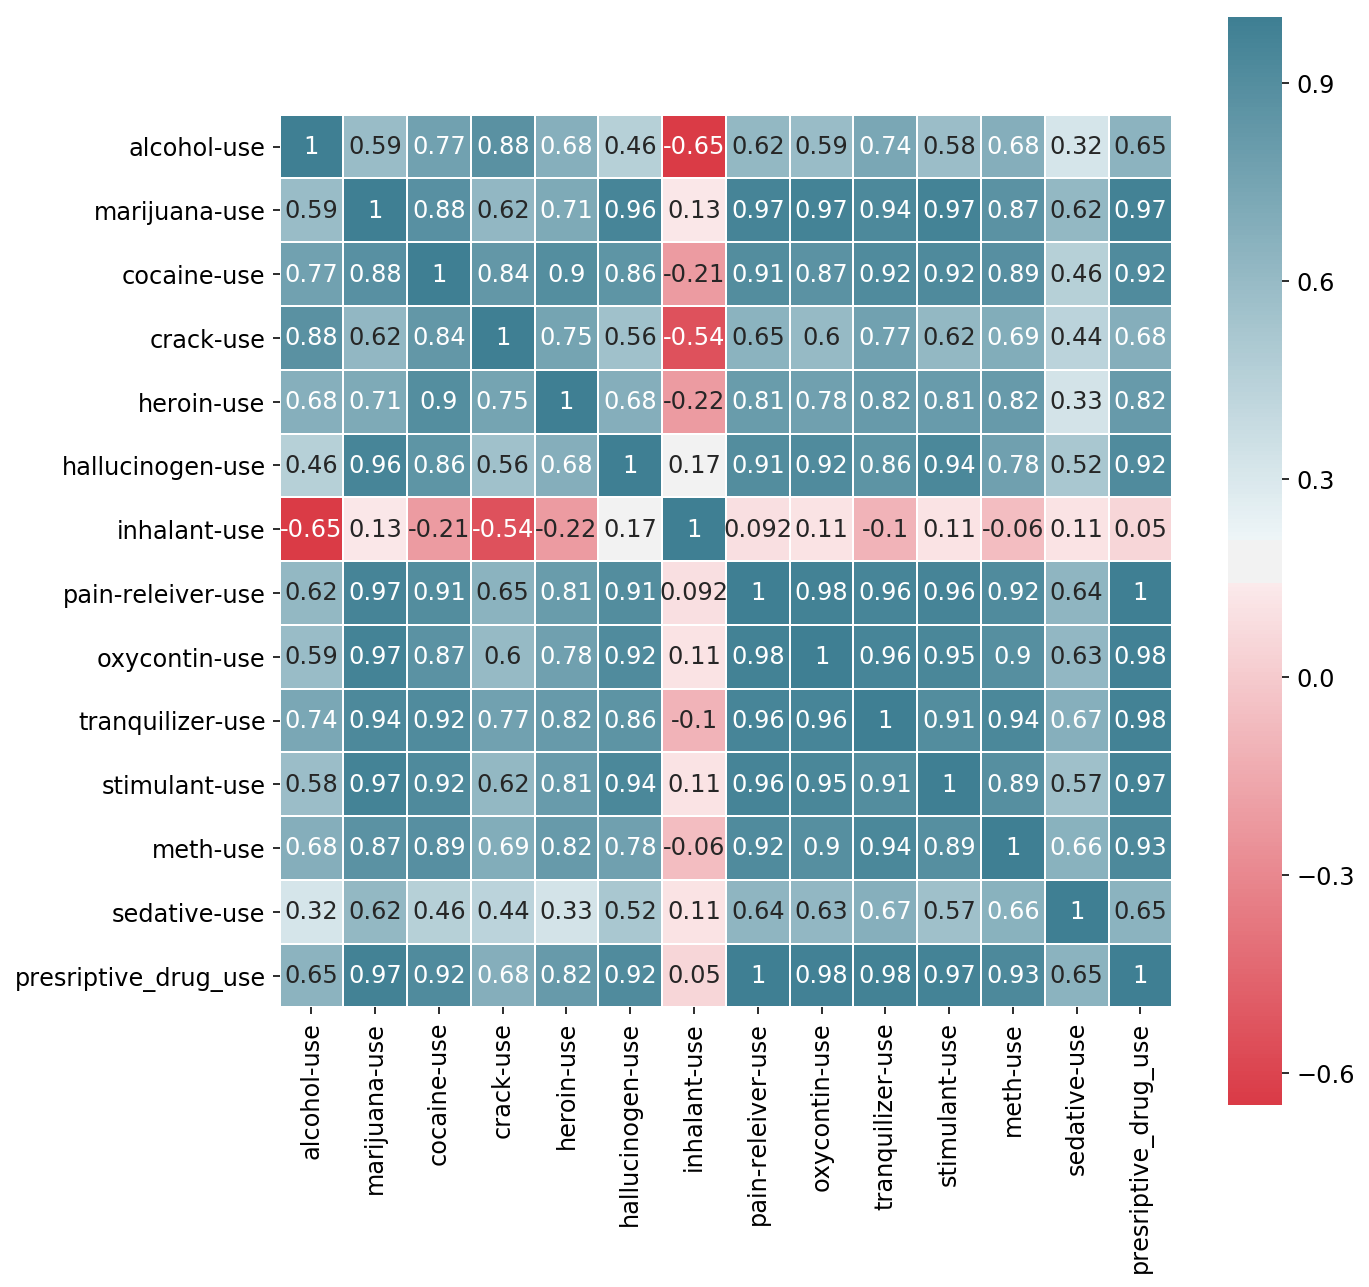

In [42]:
# Correlations for usage

plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(drug[use_col].corr(),annot=True,cmap=cmap,square=True,linewidths=0.5)
plt.show()


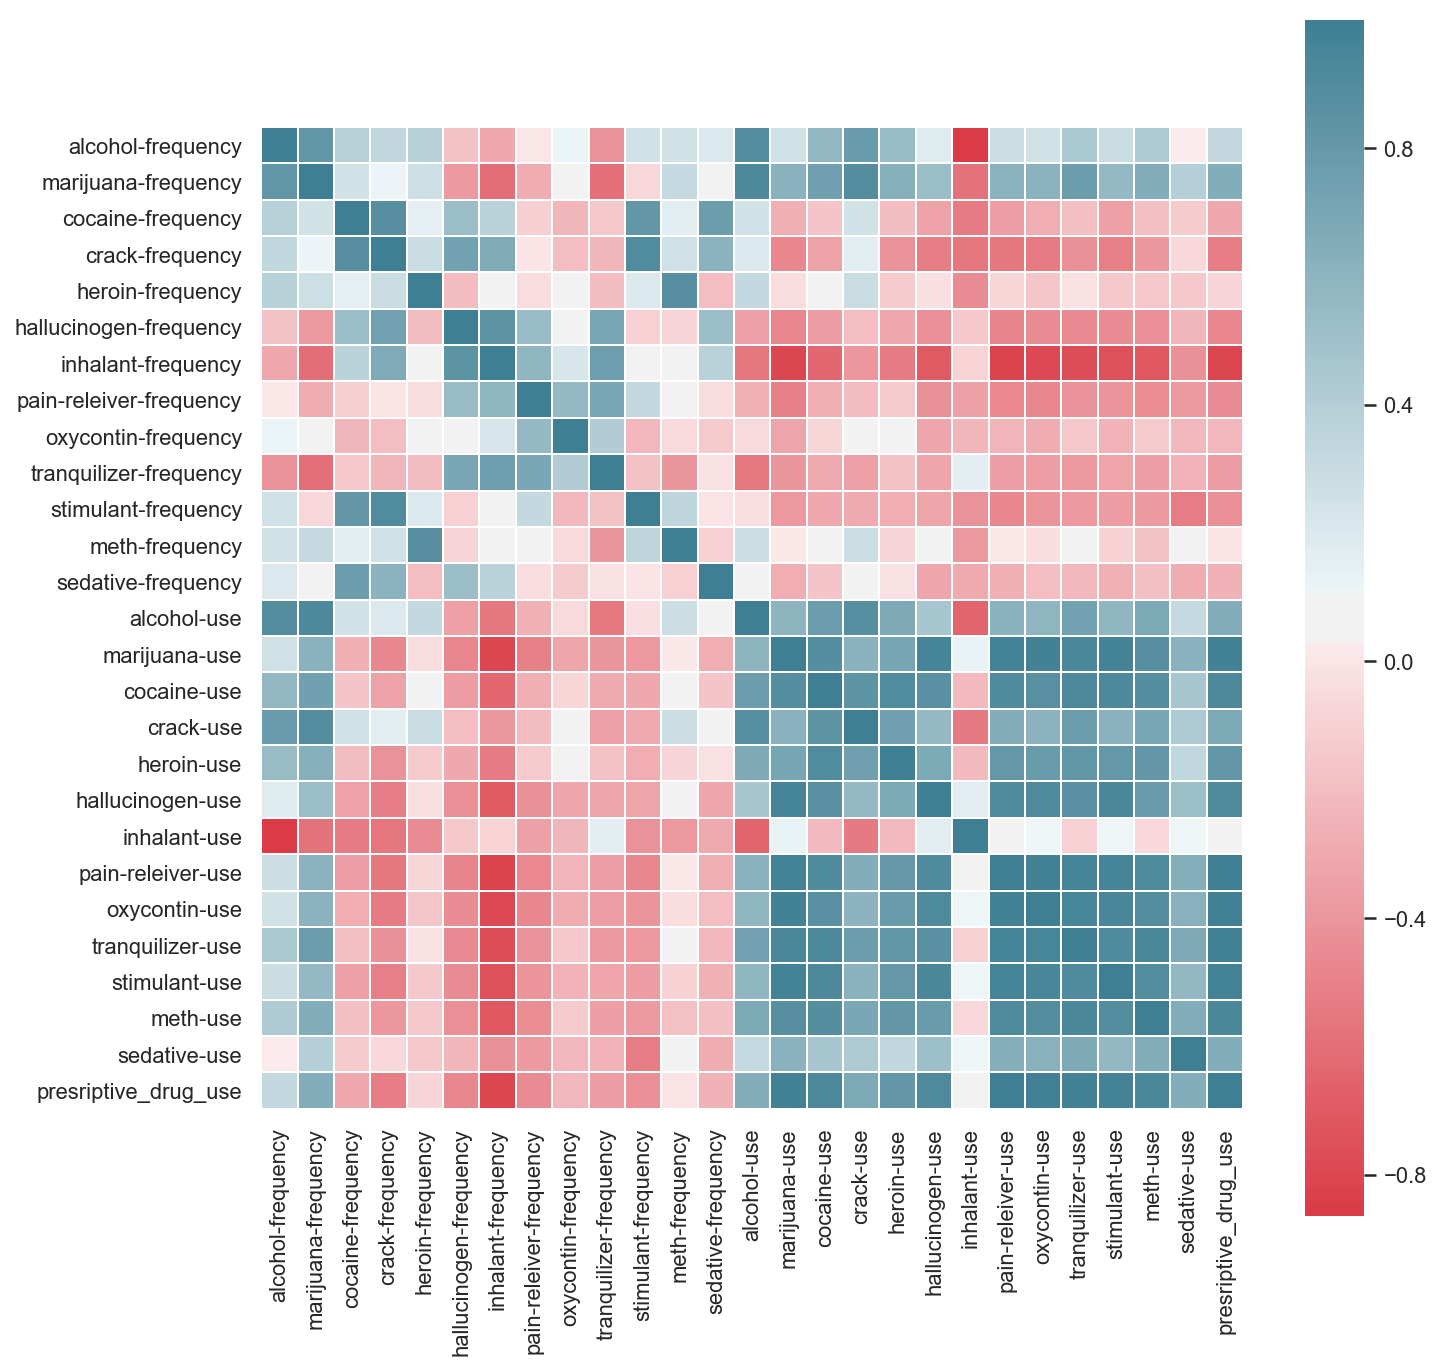

In [43]:
# Correlations for all - frequency + usage

sns.set(style="white")
plt.figure(figsize=(11,11))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(drug[corr_col].corr(),cmap=cmap,square=True,linewidths=.5,annot=False)
plt.show()

<font color='red'> `Doest not meet the expectations of this question`. You have done some graphs and correlation plots but the data inference is very poor. You need to improve a lot on your discussion section. For insstance: `We can’t say that there is sharp increase in Alcohol usage from age 20 to 21, it shows only increase  by 10. For Marijuana, we can’t say that there is increase from 19 onwards, the values are increasing steadily from age 12.`
    
You can look for nice EDA from kaggle competition and learn from it.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
<font color=blue>

---------------------------------------------------------------------------------------------------------------------------------
### Observation
There is a change of behavior observed for the for individuals who are entering early adulthood (20) from adolescent (19) 
Is this difference happen by chance?

#### Null hypothesis
There is no difference between age = 19 and age = 20

#### Alternative hypothesis
Age 19 and age 20 is different

</font>

In [44]:
# Code
age_subset = drug[(drug['age'] == '19') | (drug['age'] == '20')].iloc[0:,0:]
age_subset = pd.melt(age_subset, id_vars=['age','n'], value_vars=['alcohol-use', 'alcohol-frequency', 'marijuana-use',
                                                   'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
                                                   'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
                                                   'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
                                                   'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
                                                   'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
                                                   'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
                                                   'sedative-use', 'sedative-frequency'])
# age_subset.columns
# ['age', 'n', 'variable', 'value']
observations = (
                list(pd.to_numeric(age_subset[age_subset['age']=='19']['value'])),
                list(pd.to_numeric(age_subset[age_subset['age']=='20']['value']))
               )

chi2, p, dof, ex = stats.chi2_contingency(observations)
chi2,p

(132.5920140416338, 1.2590342928691777e-16)

<font color='red'> Actually, i do not understand your hypothesis statement. With the data given(drug usuage and frequency), how can you conclude change in behavior of the population. Also, drug usuage and frequency is different, and you are taking both category together, why?

<font color=blue>

## Conclusions:
- p < 0.5
- We can reject the null.
- There is a statistcally difference between age 19 and age 20.

---------------------------------------------------------------------------------------
### What about late adolescent (age = 20) and early adulthood (age = 21)

#### Null hypothesis
There is no difference between age = 20 and age = 21

#### Alternative hypothesis
Age 20 and age 21  is different

<font color=blue>

In [45]:
# What about late adolescent and early adulthood
age_subset = drug[(drug['age'] == '20') | (drug['age'] == '21')].iloc[0:,0:]
age_subset = pd.melt(age_subset, id_vars=['age','n'], value_vars=['alcohol-use', 'alcohol-frequency', 'marijuana-use',
                                                   'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
                                                   'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
                                                   'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
                                                   'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
                                                   'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
                                                   'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
                                                   'sedative-use', 'sedative-frequency'])
# age_subset.columns
# ['age', 'n', 'variable', 'value']
observations = (
                list(pd.to_numeric(age_subset[age_subset['age']=='20']['value'])),
                list(pd.to_numeric(age_subset[age_subset['age']=='21']['value']))
               )

chi2,p, dof, ex = stats.chi2_contingency(observations)
chi2,p

(24.94888334850529, 0.4652413606020306)

<font color=blue>

## Conclusions:
- p > 0.5
- We cannot reject the null.
- There is no statistcally difference between age 20 and age 21.

---------------------------------------------------------------------------------------
### What about teenagers in the age of 18 vs those in the age of 19?

#### Null hypothesis
There is no difference between age = 18 and age = 19

#### Alternative hypothesis
Age 18 and age 19 is different

<font color=blue>

In [46]:
# Can I group 18 to 19?
age_subset = drug[(drug['age'] == '18') | (drug['age'] == '19')].iloc[0:,0:]
age_subset = pd.melt(age_subset, id_vars=['age','n'], value_vars=['alcohol-use', 'alcohol-frequency', 'marijuana-use',
                                                   'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
                                                   'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
                                                   'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
                                                   'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
                                                   'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
                                                   'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
                                                   'sedative-use', 'sedative-frequency'])
# age_subset.columns
# ['age', 'n', 'variable', 'value']
observations = (
                list(pd.to_numeric(age_subset[age_subset['age']=='18']['value'])),
                list(pd.to_numeric(age_subset[age_subset['age']=='19']['value']))
               )

chi2,p, dof, ex = stats.chi2_contingency(observations)
chi2,p

(115.05261109167782, 1.634970149113744e-13)

<font color=blue>

## Conclusions:
- p < 0.5
- We can reject the null.
- There is statistcally difference between these 2 groups.
- They are not from the same population
- We shouldn't group age 18 and 19 together
---------------------------------------------------------------------------------------

</font>

<font color='red'> This part of the question can be improved.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

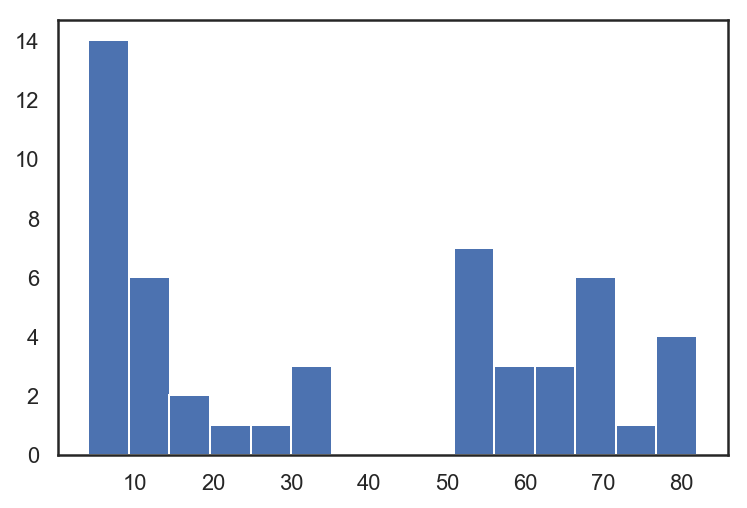

In [47]:
plt.hist(sat_exclude_all['Rate'],bins=15)
plt.show()

In [48]:
mean = sat_exclude_all['Rate'].mean()
std = sat_exclude_all['Rate'].std()
med = sat_exclude_all['Rate'].median()

(mean,std,med)

(37.0, 27.550680572356104, 33.0)

In [49]:
# Detecting outliers by taking n std from the mean
def std_outlier(data,col,n):
    """
    Identify outliers by specifying n standard deviation from the mean based on the specified col
    """
    lower_range = data[col].mean() - (n* data[col].std())
    upper_range = data[col].mean() + (n* data[col].std())
    
    return sat[(sat[col]<= lower_range) | (sat[col]>= upper_range)]

std_outlier(sat_exclude_all,'Rate',1.5).sort_values(by='Rate',ascending=False).reset_index()


,index,State,Rate,Verbal,Math,Math_converted,Verbal_converted
0,0,CT,82,509,510,51.666667,51.500000
1,1,NJ,81,499,513,52.166667,49.833333
2,2,MA,79,511,515,52.500000,51.833333


In [50]:
# Highlight states that are outlier calculating using 1.5 standard deviation away from the mean

sat_exclude_all['outlier_flag'] = [1 if state in list(std_outlier(sat_exclude_all,'Rate',1.5)['State']) 
                           else 0 for state in sat_exclude_all['State']]
sat_exclude_all = sat_exclude_all.sort_values(by='Rate',ascending=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


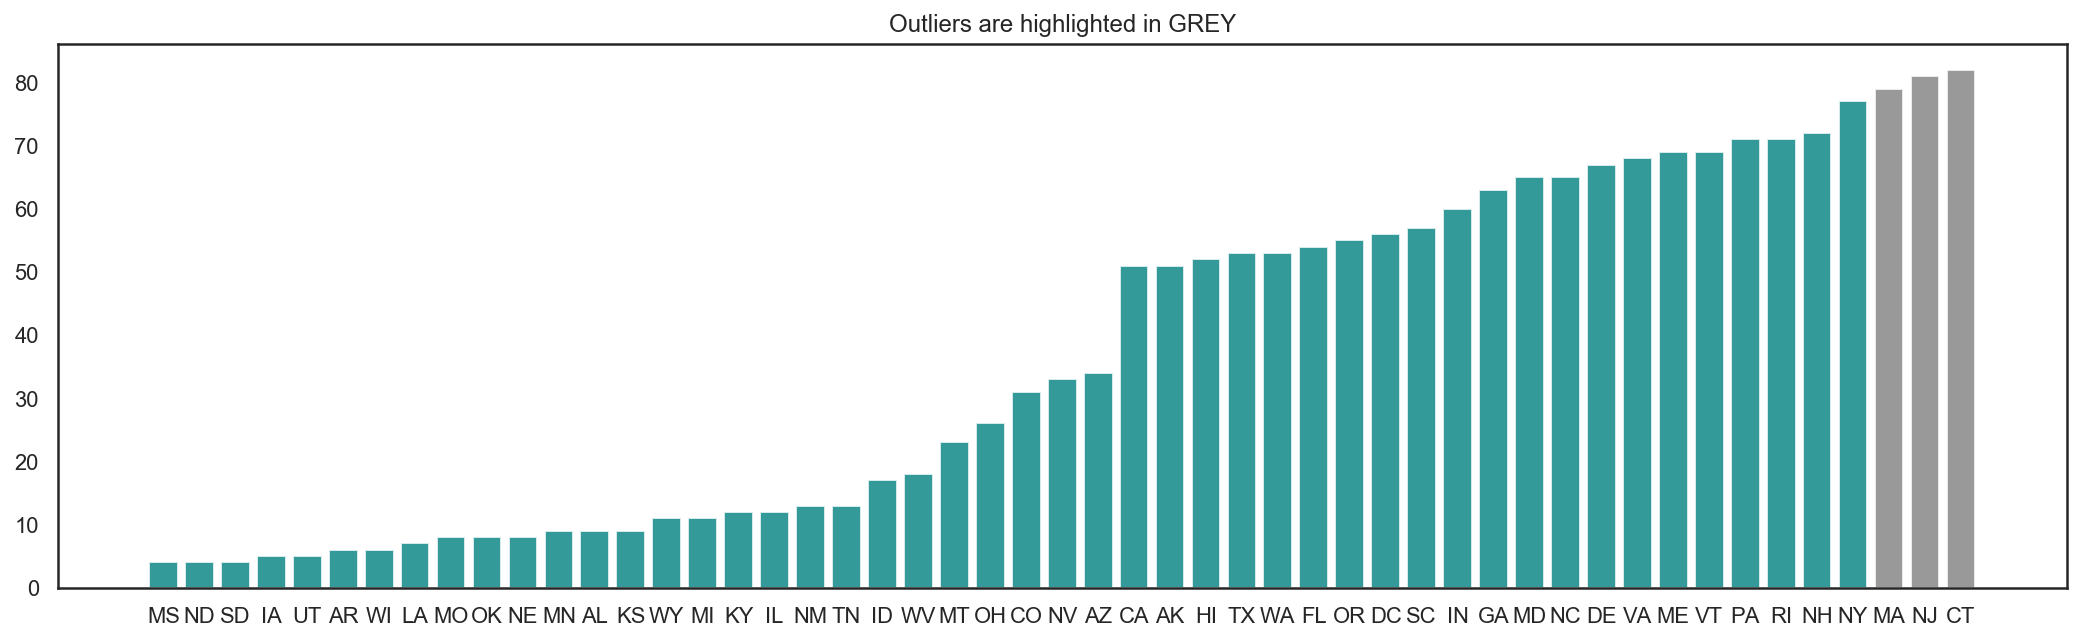

In [51]:
color = {True:'grey',False:'teal'}
plt.figure(figsize=(18,5))
plt.bar(sat_exclude_all['State'],sat_exclude_all['Rate'], color=[color[val] \
         for val in sat_exclude_all['outlier_flag']],alpha = 0.8)
plt.title('Outliers are highlighted in GREY')
plt.show()

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [52]:
print("Spearman Correlation: {}".format(stats.spearmanr(sat_exclude_all['Verbal'],sat_exclude_all['Math'])))
print("Pearson Correlation: {}".format(stats.pearsonr(sat_exclude_all['Verbal'],sat_exclude_all['Math'])))

Spearman Correlation: SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)
Pearson Correlation: (0.8999093181811045, 2.735579353543622e-19)


<font color=blue>

# Spearman Rank Correlation
https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials

A measure of rank order correlation.
Works for any general trend that is either strictly decreasing or increasing also known as monotonic association (not a mixed of movement), not necessarily linear.
Comparing to Pearson, instead of using means and variances, Spearman looks at relative order of the values for each variable.
This makes Spearman appropriate to use for either discrete or continuous data.

The formula for Spearman's coefficient looks very similar to that of Pearson, with the distinction of being computed on ranks instead of raw scores: 
        <img src="https://render.githubusercontent.com/render/math?math=%7B%5Crho%20_%7B%7Brank%7D%20_%7BX%7D%2C%7Brank%7D%20_%7BY%7D%7D%3D%7B%5Cfrac%7Bcov%28%20%7Brank%7D_%7BX%7D%2C%20%7Brank%7D_%7BY%7D%29%7D%7B%5Csigma_%7B%7Brank%7D_%7BX%7D%7D%5Csigma_%7B%7Brank%7D_%7BY%7D%7D%7D%7D%7D&mode=display">
        
  </font>
       

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [53]:
sat_new['rate_percentile'] = sat_new['Rate'].rank(pct=True)*100
sat_new.tail(10)

NameError: name 'sat_new' is not defined

In [ ]:
"California is at {:.0f}th percentile".format(sat_new[sat_new['State']=='CA']['rate_percentile'].mean())


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [ ]:
## not complete yet
